# **Titanic Survival Prediction using NAIVE BAYES**

## **About the Project**
In this project, we work with the Titanic dataset, which contains information about passengers such as age, sex, fare, class, and more.
Our objective is to build a classification model that predicts whether a passenger survived the Titanic shipwreck using the Naive Bayes algorithm.

## **Goal**
To use the Naive Bayes classification technique to build a model that predicts the survival of passengers on the Titanic.

## **Dataset Details**
* PassengerId: Unique ID for each passenger  
* Survived: Survival status (0 = No, 1 = Yes)  
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
* Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked: Other demographic and travel details

## **Methodologies**
* Data Cleaning and Preprocessing: Handling missing values and encoding categorical data  
* Exploratory Data Analysis (EDA): Understanding feature distributions and relationships  
* Model Building: Applying Naive Bayes classifier  
* Model Evaluation: Using confusion matrix and accuracy score

## **Model Evaluation**
The performance of the Naive Bayes classifier was evaluated using the following metrics:

* **Confusion Matrix** – To assess the true positives, true negatives, false positives, and false negatives.
* **Accuracy Score** – To determine the percentage of correctly predicted observations.
* **Classification Report** – Provided insights into precision, recall, and F1-score for each class.

These metrics help in understanding how well the model is able to generalize on unseen data.

## **Skills Developed**
* Practical experience in **data cleaning and preprocessing** with pandas and NumPy.
* Proficiency in **exploratory data analysis (EDA)** using seaborn and matplotlib.
* Understanding the working principles and assumptions of the **Naive Bayes algorithm**.
* Gaining insights into **model evaluation** through confusion matrix, accuracy score, and classification reports.
* Improved ability to **structure machine learning projects** using a consistent workflow.


### **Importing basic Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### **Choose Dataset file from Local Directory**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanicsurvival.csv to titanicsurvival (1).csv


### **Load Dataset**

In [3]:
dataset = pd.read_csv('titanicsurvival.csv')

### **Summarize Dataset**

In [4]:
print(dataset.shape)
print(dataset.head(5))

(891, 5)
   Pclass     Sex   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [25]:
dataset.shape

(891, 5)

### **Mapping Text Data to Binary Value**

In [5]:
income_set = set(dataset['Sex'])
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      Pclass  Sex   Age     Fare  Survived
0         3    1  22.0   7.2500         0
1         1    0  38.0  71.2833         1
2         3    0  26.0   7.9250         1
3         1    0  35.0  53.1000         1
4         3    1  35.0   8.0500         0
..      ...  ...   ...      ...       ...
886       2    1  27.0  13.0000         0
887       1    0  19.0  30.0000         1
888       3    0   NaN  23.4500         0
889       1    1  26.0  30.0000         1
890       3    1  32.0   7.7500         0

[891 rows x 5 columns]>


### **Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)**

In [36]:
X = dataset.drop('Survived',axis='columns')
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [7]:
Y = dataset.Survived
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### **Finding & Removing NA values from our Features X**

In [54]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [55]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

### **Test again to check any NA value**


In [56]:
X.columns[X.isna().any()]

Index([], dtype='object')

## **DETECTING RELATIONSHIPS IN THE DATASET**

## **1. Pairwise relationship**

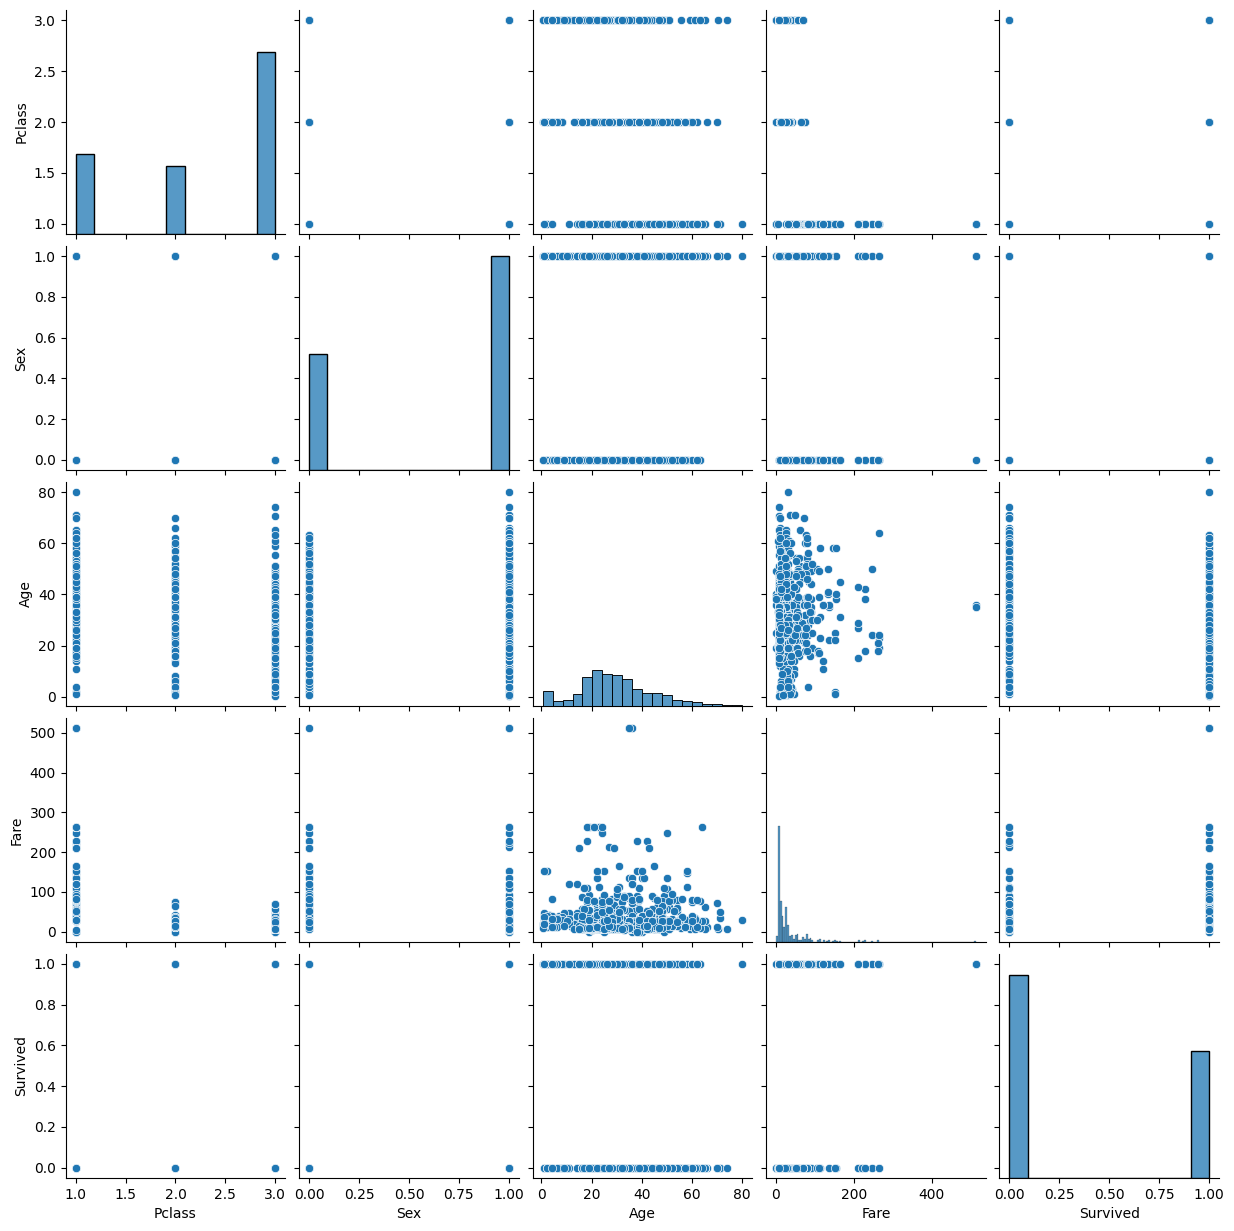

In [38]:
sns.pairplot(dataset)

## **2. Age vs. Fare vs. Survival**

<Axes: xlabel='Age', ylabel='Fare'>

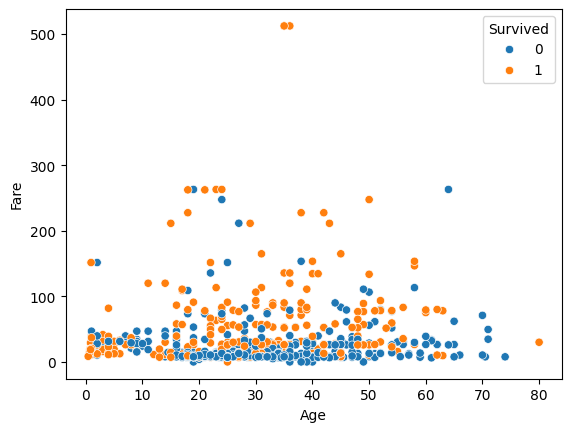

In [40]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=dataset)

## **3. Correlation Between numeric features**

<Axes: >

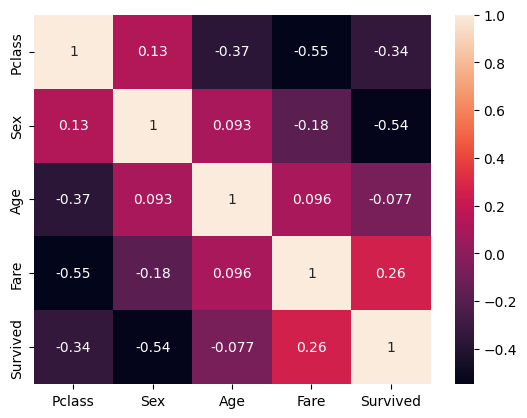

In [41]:
sns.heatmap(dataset.corr(),annot=True)

## **4. Survival rate vs Age groups**

<Axes: xlabel='Age', ylabel='Density'>

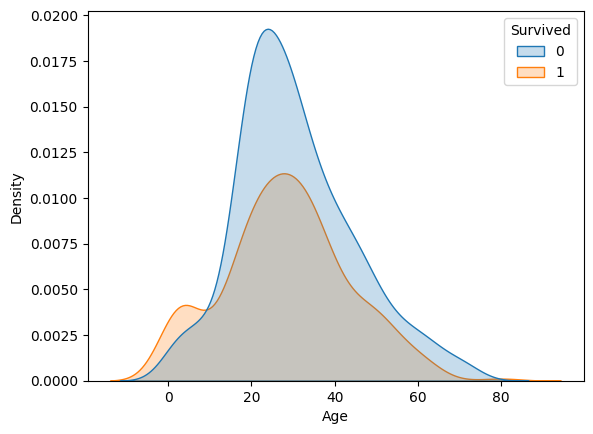

In [45]:
sns.kdeplot(data=dataset, x='Age', hue='Survived', fill=True)

## **ANALYZING SURVIVAL BY CATEGORY**

## **1. Compare Survival by gender**

<Axes: xlabel='Pclass', ylabel='count'>

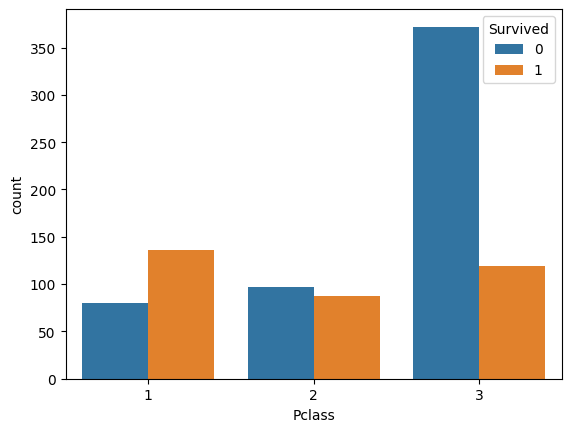

In [46]:
sns.countplot(x='Pclass', hue='Survived', data=dataset)

## **2. Compare Survival by Class**

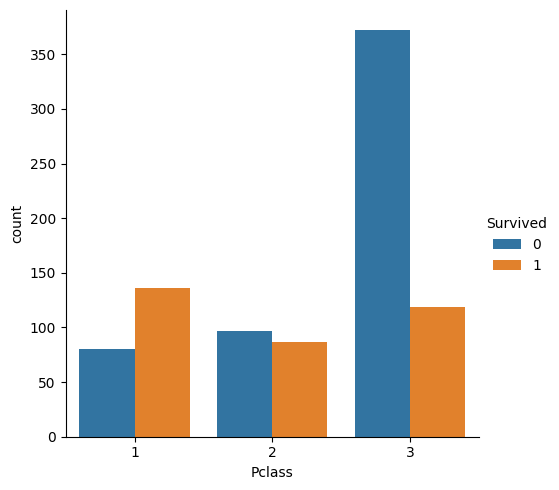

In [52]:
sns.catplot(x='Pclass', hue='Survived', data=dataset, kind='count')

### **Splitting Dataset into Train & Test**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state =0)

### **Training**

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### **Predicting, whether Person Survived or Not**

In [13]:
pclassNo = int(input("Enter Person's Pclass number: "))
gender = int(input("Enter Person's Gender 0-female 1-male(0 or 1): "))
age = int(input("Enter Person's Age: "))
fare = float(input("Enter Person's Fare: "))
person = [[pclassNo,gender,age,fare]]
result = model.predict(person)
print(result)

if result == 1:
  print("Person might be Survived")
else:
  print("Person might not be Survived")

Enter Person's Pclass number: 1
Enter Person's Gender 0-female 1-male(0 or 1): 1
Enter Person's Age: 26
Enter Person's Fare: 30
[0]
Person might not be Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### **Prediction for all Test Data**

In [14]:
y_pred = model.predict(X_test)
print(np.column_stack((y_pred,y_test)))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

## **Confusion Matrix**

In [33]:
cm = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[110  29]
 [ 21  63]]


### **Accuracy of our Model**

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 77.57847533632287%


## **Conclusion**
The Naive Bayes model performed reasonably well on the Titanic dataset despite its assumptions of feature independence.

Key takeaways:
* Age, sex, and passenger class were significant indicators of survival.
* Females and higher-class passengers had better survival rates.
* Data preprocessing, especially handling missing values and encoding, played a key role in the model's performance.

This project illustrates the effectiveness and simplicity of Naive Bayes in solving binary classification problems.

However, While Naive Bayes is a simple and fast algorithm, it makes strong independence assumptions that limit its predictive power.
The accuracy score you're seeing is not low, but rather reflects the natural ceiling for this model without deeper feature engineering or more advanced algorithms.

However, futuer work will include considering:

* Including more informative features (like Embarked, SibSp, Parch, and engineered features like Title or IsAlone),

* Exploring more expressive models like Logistic Regression or Random Forests, and

* Applying cross-validation for more robust evaluation.


